## Аналитика в Яндекс.Афише

Предоставлены данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года

### Цель:

Помочь маркетологам оптимизировать маркетинговые затраты.

### Шаг 1. Импорт библиотек и данных.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

##### Выгружаем данные о количестве сессий пользователей с июня 2017 по конец мая 2018 года.

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv') 
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


### Вывод.

Нам представлена информация о 359400 сессиях, по каждой из которых известно:
- устройство
- начало и конец
- рекламный источник
- пользователь

Тип данных столбцов End Ts и Start Ts требует изменения, как и названия столбцов.

##### Выгружаем данные о количестве заказов пользователей.

In [4]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


### Вывод.

Нам представлена информация о 50415 заказах, по каждому из которых известно:
- дата и время
- выручка
- пользователь

Тип данных столбцов Buy Ts и Revenue необходимо изменить, как и названия столбцов.

##### Выгружаем данные о затратах на маркетинг.

In [6]:
costs = pd.read_csv('/datasets/costs.csv') 
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Вывод.

Нам представлена информация о 2542 платежах, по каждому из которых известно:
- рекламный источник
- дата
- затраты

Тип данных столбцов dt и costs необходимо изменить.

### Шаг 2. Предобработка данных.

- Приведем названия столбцов к единому виду:

   -запись в нижнем регистре
   
   -нижний слеш вместо пробела

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']

- Поменяем тип данных

In [10]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits.query('end_ts < start_ts')

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


В двух сессиях окончание раньше начала. Возможно это связано с "быстрой кнопкой покупки" на стороннем сайте, когда пользователь сначала переходит на конечную страницу, например в корзину, а потом регистрируется. Зависит от того как настроен сервис. 

Не будем учитывать эти строки. 

In [12]:
visits=visits.query('end_ts >= start_ts')

In [13]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders['revenue']=round(orders['revenue']).astype('int64')
orders.query('buy_ts == "2018-06-01 00:02:00"')

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3,83872787173869366


Поскольку в июне числится 1 заказ, хотя эта сессия началась в мае, не будем его учитывать в рассчетах по продажам, чтобы он не влиял на результат.

In [14]:
orders=orders.query('buy_ts != "2018-06-01 00:02:00"')

In [15]:
costs['dt']=pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs['costs']=round(costs['costs']).astype('int64')

### Шаг 2. Отчёты и метрики.

##### Продукт.

- Популярность устройств для входа в сервис.

([<matplotlib.patches.Wedge at 0x7f4d718e0410>,
 [Text(-0.823820767871155, -0.7289165538140705, 'desktop'),
  Text(0.8238207678711551, 0.7289165538140704, 'touch')],
 [Text(-0.4493567824751754, -0.3975908475349475, '73.1%'),
  Text(0.44935678247517546, 0.39759084753494744, '26.9%')])

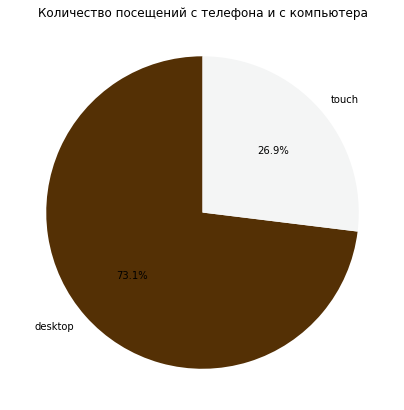

In [16]:
devices_part = visits.pivot_table(index = 'device', values = 'uid', aggfunc = 'count')
devices_part['%']=round(devices_part['uid']/devices_part['uid'].sum()*100)

labels = devices_part.index
sizes = devices_part['uid']

fig1, ax1 = plt.subplots(figsize=(7,7))

ax1.axis('equal') 
plt.title('Количество посещений с телефона и с компьютера')
theme = plt.get_cmap("BrBG")
ax1.set_prop_cycle("color", [theme(1. * i / 2)
                             for i in range(2)])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 


### Вывод

В подавляющем большинстве пользователи используют компьютер.

- Показатели использования сервиса в день, неделю, месяц

In [17]:
visits['year']  = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 9 columns):
device       359398 non-null object
end_ts       359398 non-null datetime64[ns]
source_id    359398 non-null int64
start_ts     359398 non-null datetime64[ns]
uid          359398 non-null uint64
year         359398 non-null int64
month        359398 non-null int64
week         359398 non-null int64
date         359398 non-null object
dtypes: datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 27.4+ MB


Выделим сессии с комьютера и телефона.

In [19]:
visits_desktop=visits.query('device == "desktop"')
visits_touch=visits.query('device == "touch"')

In [20]:
def dau_total(data):
    dau = data.groupby('date').agg({'uid': 'nunique'}).mean()
    return dau

def wau_total(data):
    wau = data.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
    return wau

def mau_total(data):
    mau = data.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
    return mau


In [21]:
print('В среднем сервисом Яндекс.Афиша пользуются:')
print(int(dau_total(visits)),'людей в день: с компьютера -', int(dau_total(visits_desktop)),',с мобильного -', int(dau_total(visits_touch)))
print(int(wau_total(visits)),'людей в неделю: с компьютера -', int(wau_total(visits_desktop)),',с мобильного -', int(wau_total(visits_touch)))
print(int(mau_total(visits)),'людей в месяц: с компьютера -', int(mau_total(visits_desktop)),',с мобильного -', int(mau_total(visits_touch)))

В среднем сервисом Яндекс.Афиша пользуются:
907 людей в день: с компьютера - 659 ,с мобильного - 252
5716 людей в неделю: с компьютера - 4129 ,с мобильного - 1634
23228 людей в месяц: с компьютера - 16724 ,с мобильного - 6825


In [22]:
sticky_factor_total = dau_total(visits)/mau_total(visits)*100
print('"Липкий фактор" равен', round(sticky_factor_total[0], 2))

"Липкий фактор" равен 3.91


### Вывод

- Показатели использования в день, неделю и месяц соответсвуют общей разбивке по устройствам: с мобильного в среднем заходят 27% пользователей.
- Число активных пользователей в месяц внушительное. Сервис популярен.

- Изменения показателя пользования продуктом во времени

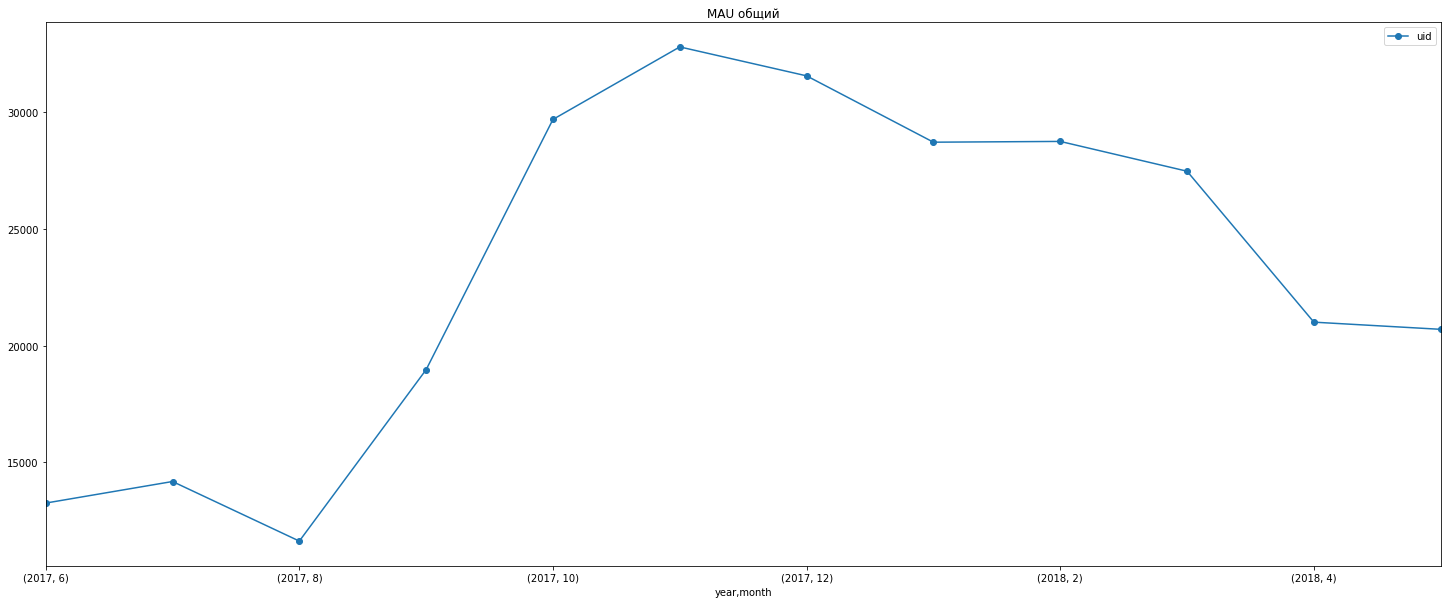

In [23]:
visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).plot(style = '-o', figsize = (25, 10), title = 'MAU общий')

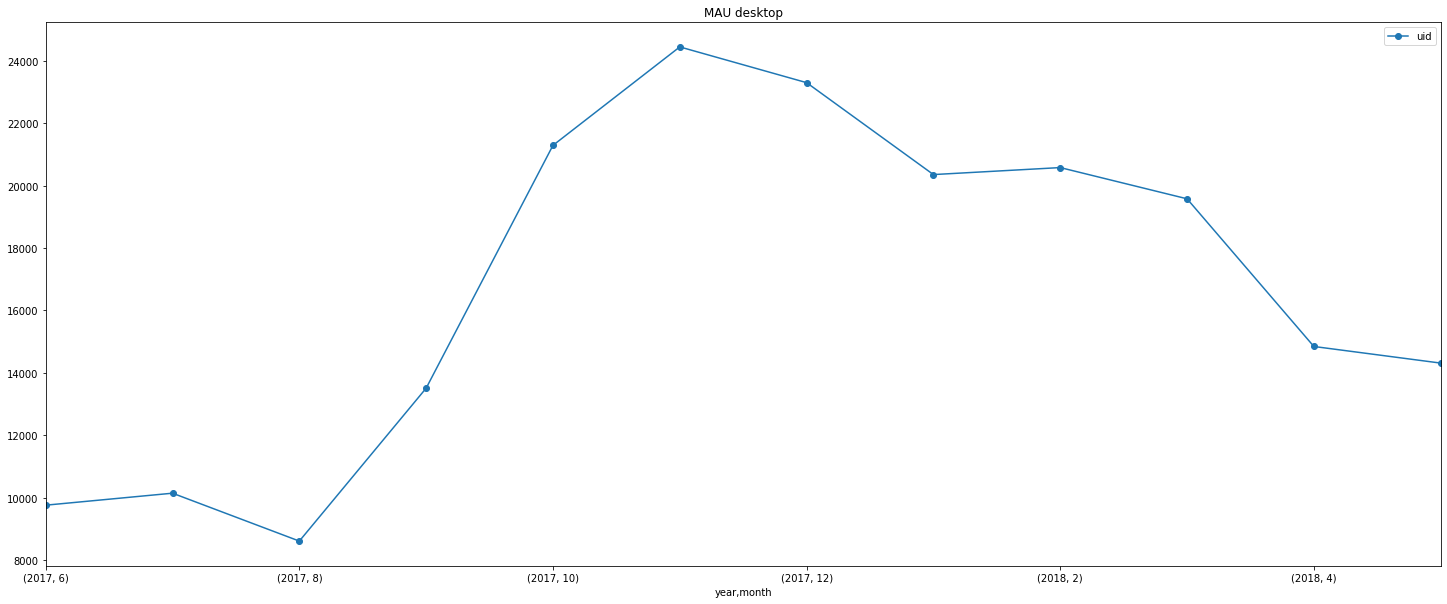

In [24]:
visits_desktop.groupby(['year', 'month']).agg({'uid': 'nunique'}).plot(style = '-o', figsize = (25, 10), title = 'MAU desktop')

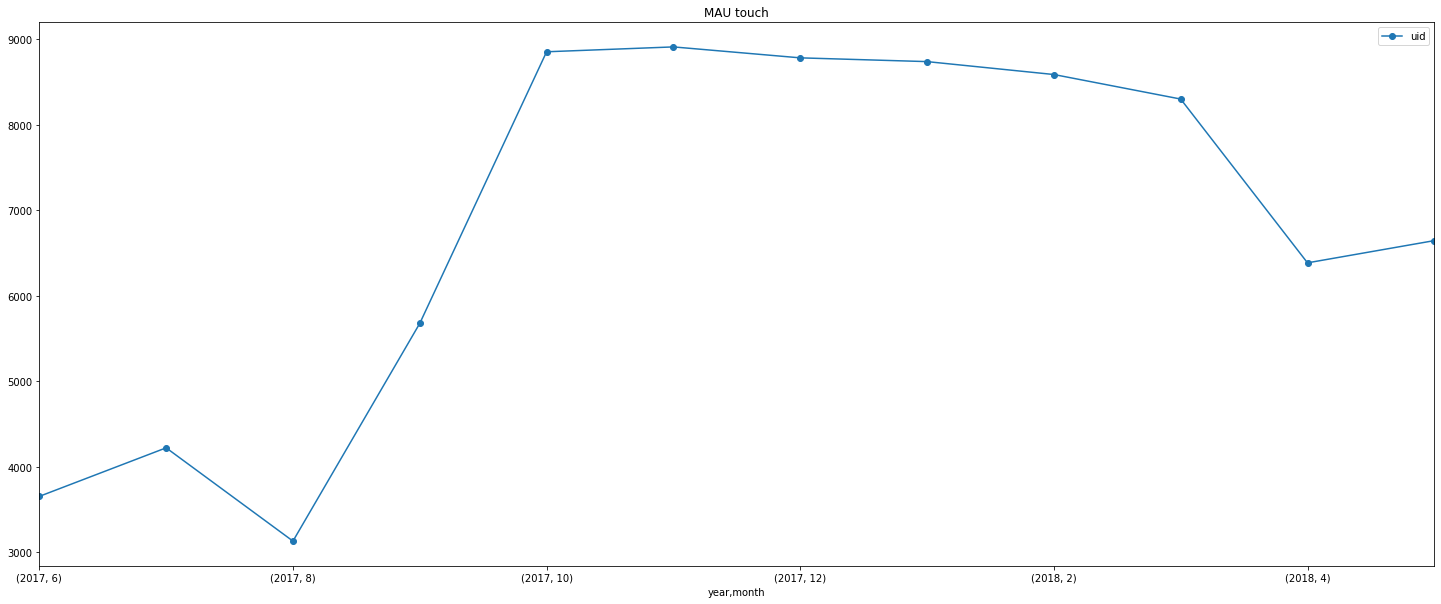

In [25]:
visits_touch.groupby(['year', 'month']).agg({'uid': 'nunique'}).plot(style = '-o', figsize = (25, 10), title = 'MAU touch')

### Вывод:

- Параметр пользования заметно подрос.
- Особенно заметен рост использования сервиса с мобильных устройств. И к началу нового годового цикла, учитывая, что у нас срез с июня по май, сервис пришел с заметно нарощенным количеством пользователей. Возможно мобильную версию дорабатывали.

 - Сколько сессий в день?

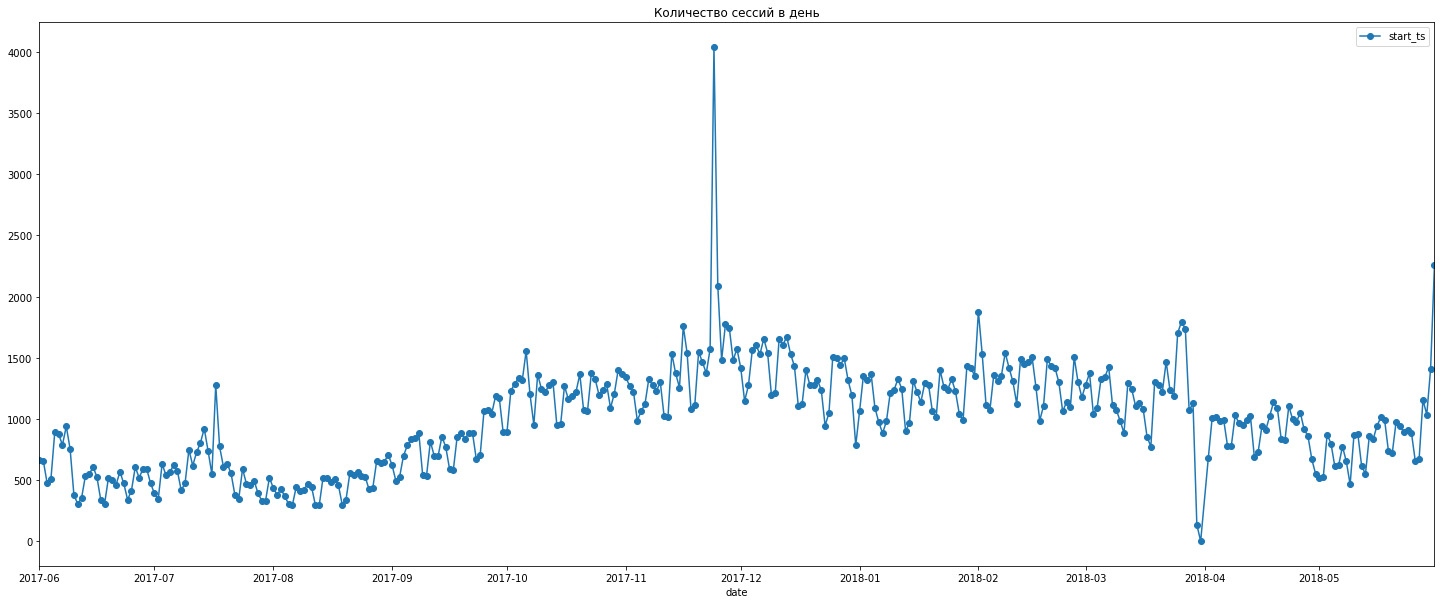

In [26]:
visits.groupby('date').agg({'start_ts':'count'}).plot(style = '-o', figsize = (25, 10), title = 'Количество сессий в день')

In [27]:
date_session_count_desktop=visits_desktop.groupby('date').agg({'start_ts':'count'})
date_session_count_touch=visits_touch.groupby('date').agg({'start_ts':'count'})

print('В день в среднем происходит',round(visits.groupby('date').agg({'start_ts':'count'}).mean()[0]),'сессий, из них:')
print('с компьютера - ',date_session_count_desktop.mean()[0].astype('int64'),'сессия,')
print('с телефона - ',date_session_count_touch.mean()[0].astype('int64'),'сессий.')

В день в среднем происходит 987 сессий, из них:
с компьютера -  721 сессия,
с телефона -  266 сессий.


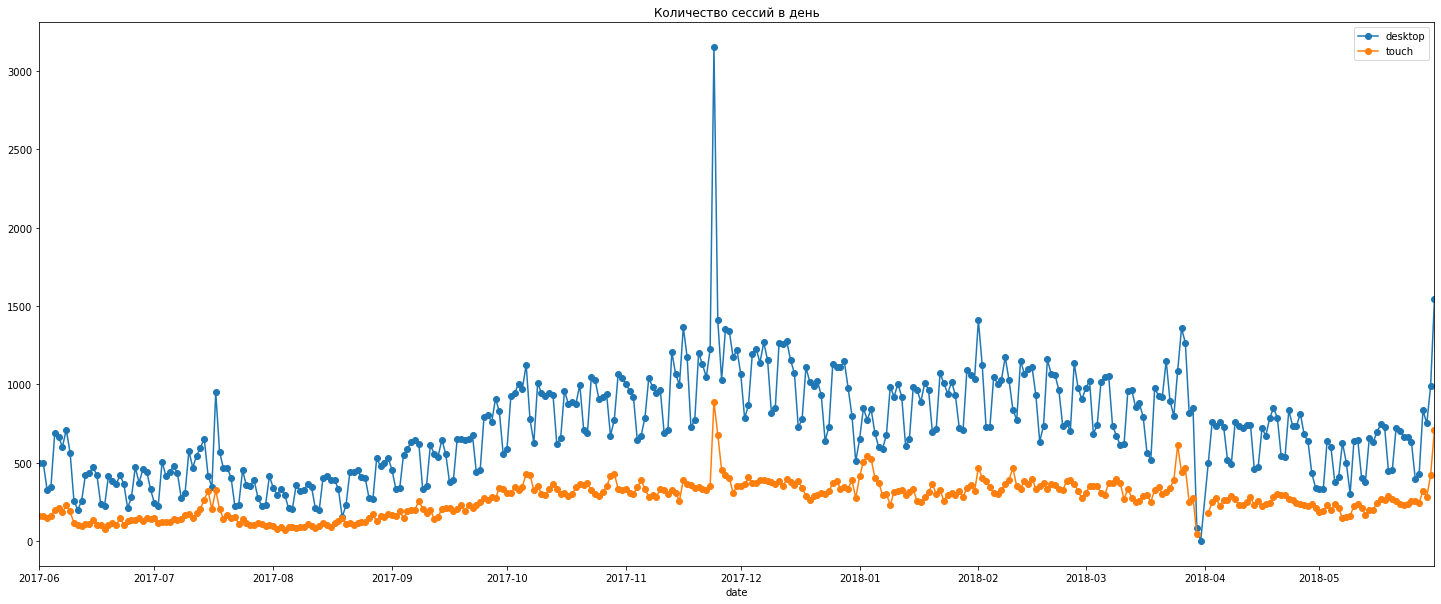

In [28]:
date_session_count_device=date_session_count_desktop.merge(date_session_count_touch, on = 'date', how='outer')
date_session_count_device.columns=['desktop','touch']

date_session_count_device.plot(style = '-o', figsize = (25, 10), title = 'Количество сессий в день')

### Вывод

- Количество сессий в день немногим больше количества пользователей. В среднем человек заходит на сервис 1,09 раз в день. Можно предположить, что информации на сервисе достаточно и она изложена понятно, за счет чего человеку не требуется ее постоянно уточнять, возвращаясь.

- Распределение сессий с телефона более гладкое, нет таких скачков как в случае с компьютером, но в целом дни роста и падения количества сессий по каждому из устройств не сильно отличаются. 

- Рассмотрим всплеск, который заметен на графике:

In [30]:
visits.groupby('date').agg({'start_ts':'count'}).query('start_ts > 2500')

,start_ts
date,
2017-11-24,4042


In [31]:
visits['date']=pd.to_datetime(visits['date'], format='%Y-%m-%d')
visits.query('date == "2017-11-24"')['uid'].nunique()


3319

In [32]:
visits_without_outburst=visits.groupby('date').agg({'start_ts':'count'}).query('start_ts < 2500')
visits_without_outburst.mean()

start_ts    978.942149
dtype: float64

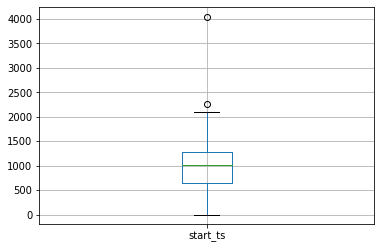

In [33]:
visits.groupby('date').agg({'start_ts':'count'}).boxplot()

In [34]:
visits_without_outburst2=visits.groupby('date').agg({'start_ts':'count'}).query('start_ts < 2000')
visits_without_outburst2.mean()

start_ts    972.32964
dtype: float64

- Сильный всплеск произошел 24.11.2017. 
- В этот день было зафиксировано 4042 сессии. 
- 3319 из них совершены уникальными пользователями. Возможно в этот период открывалась продажа билетов на какое-то очень популярное мероприятие, которое обычно предполагает быстрый sold out.
- Если не учитывать этот день в расчете среднего количества сессий в день, значение поменяется, но не так сильно - 979 сессий против 987. Если отбрасывать все выбросы, этот параметр будет равен 972. 

- Сколько длится одна сессия?

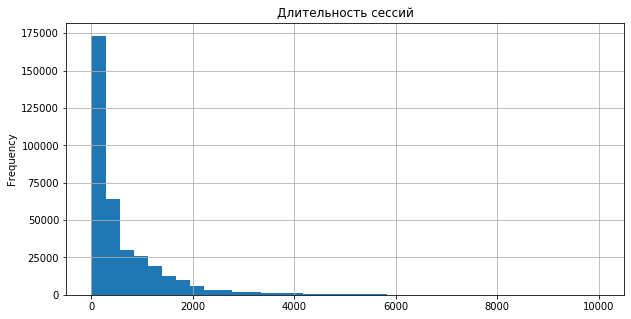

In [35]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts'])/ np.timedelta64(1,'s')
visits_desktop['session_duration'] = (visits_desktop['end_ts'] - visits_desktop['start_ts'])/ np.timedelta64(1,'s')
visits_touch['session_duration'] = (visits_touch['end_ts'] - visits_touch['start_ts'])/ np.timedelta64(1,'s')

visits['session_duration'].plot(kind = 'hist', grid=True, title = 'Длительность сессий', bins = 36, range = (0,10000),  figsize = (10, 5))


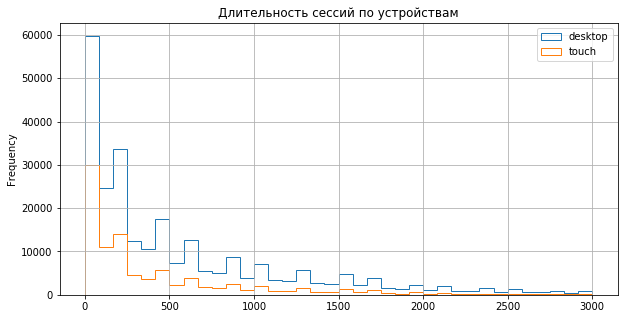

In [36]:
visits_desktop['session_duration'].plot(kind = 'hist', title = 'Длительность сессий по устройствам', histtype='step', grid=True, legend=True, label = 'desktop', figsize = (10, 5), bins = 36, range = (0,3000))
visits_touch['session_duration'].plot(kind = 'hist', histtype='step', grid=True, legend=True, label = 'touch', bins = 36, range = (0,3000))

In [37]:
print('— Большинство сессий длится {:.4}'.format(visits['session_duration'].mode()[0]),'секунд')
print('— По устройствам этот показатель не отличается.')


— Большинство сессий длится 60.0 секунд
— По устройствам этот показатель не отличается.


### Вывод

Продолжительность большинства сессий составляет 1 минуту. Видимо, интерфейс понятен и пользователь "не блуждает".

- Как часто люди возвращаются

In [38]:
def retention(data):
    first_activity_date = data.groupby(['uid'])['start_ts'].min()
    first_activity_date.name = 'first_activity_date'

    visits_activity = data.join(first_activity_date,on='uid') 
    visits_activity['first_activity_month'] = visits_activity['first_activity_date'].astype('datetime64[M]')
    visits_activity['activity_month'] = visits_activity['start_ts'].astype('datetime64[M]')
    visits_activity['cohort_lifetime'] = (visits_activity['activity_month'] - visits_activity['first_activity_month']) 
    visits_activity['cohort_lifetime']=(visits_activity['cohort_lifetime']/ (np.timedelta64(1,'M'))).round()

    cohorts = visits_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

    cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

    retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
    return retention_pivot


 -Всего по сервису:

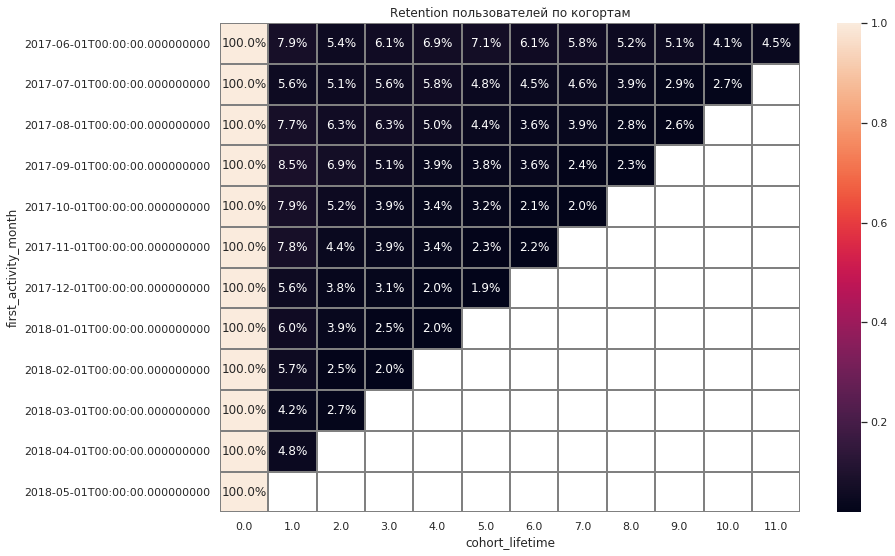

In [39]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention пользователей по когортам')
sns.heatmap(retention(visits), annot=True, fmt='.1%', linewidths=1, linecolor='gray')

-С компьютера:

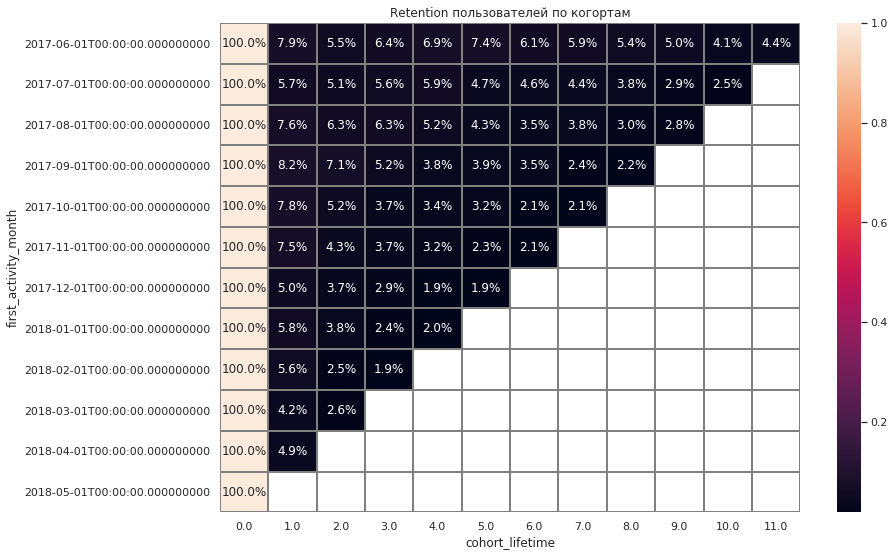

In [40]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention пользователей по когортам')
sns.heatmap(retention(visits_desktop), annot=True, fmt='.1%', linewidths=1, linecolor='gray')

-С мобильного:

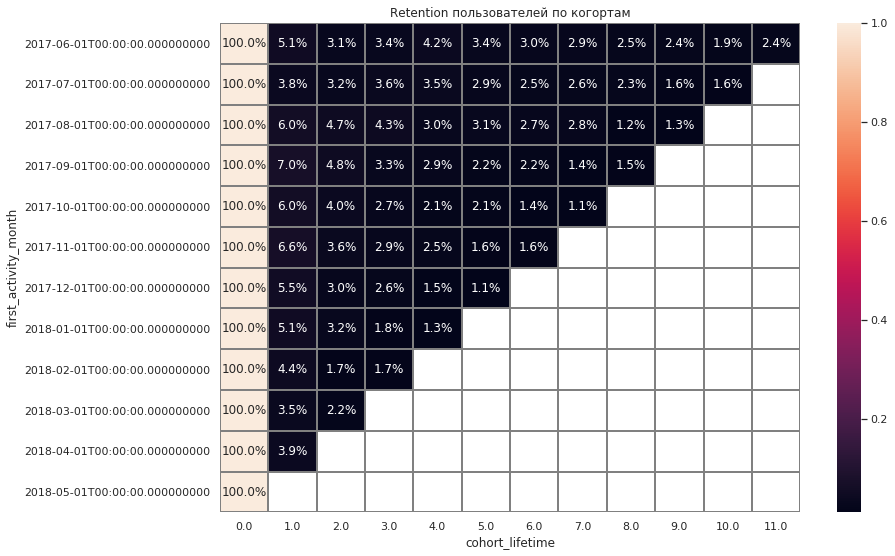

In [41]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention пользователей по когортам')
sns.heatmap(retention(visits_touch), annot=True, fmt='.1%', linewidths=1, linecolor='gray')

### Вывод

- С четвертой недели retention rate начинает убывать по когортам с течением времени. Так, за 7 месяцев коэффициент удержания упал в среднем на 4%. Думаю, что это неплохой показатель для сервиса заказа билетов.
- Прослеживается сезонность.
- Июньская когорта показывает лучший результат.
- Retention rate подьзователей, выбирающих для входа компьютер значительно выше, чем у пользователей, решивших войти с телефона.
- Пользователи чаще возвращаются на сайт, используя компьютер. Cтоит проверить мобильную версию сайта:
  - Может у них возникают неудобства при оплате заказа - например с вводом карты, тогда стоит реализовать возможность оплаты через Pay
  - или с телефона неудобно выбрать место в зале, тогда стоит добавить возможность маштабизования карты.


##### Продажи

- Когда люди начинают покупать?

In [42]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

orders['order_day'] = orders['buy_ts'].astype('datetime64[D]')
first_orders_day = orders.groupby('uid').agg({'order_day': 'min'}).reset_index() 
first_orders_day.columns = ['uid', 'first_order_day'] 
first_orders_day

visits['session_day'] = visits['start_ts'].astype('datetime64[D]') 
first_session_day = visits.groupby('uid').agg({'session_day': 'min'}).reset_index() 
first_session_day.columns = ['uid', 'first_session_day'] 
first_session_day

visits_orders_day=pd.merge(first_orders_day,first_session_day, on='uid', how='right')
visits_orders_day['days_before_order']=(visits_orders_day['first_order_day'] - visits_orders_day['first_session_day'])
visits_orders_day['days_before_order']=(visits_orders_day['days_before_order']/ (np.timedelta64(1,'D'))).round()


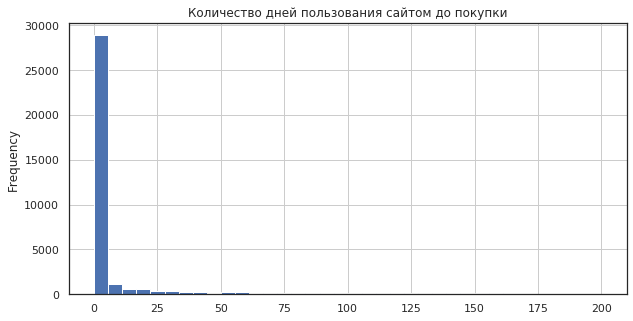

In [43]:
visits_orders_day['days_before_order'].plot(kind = 'hist', grid=True, title = 'Количество дней пользования сайтом до покупки', bins = 36, range = (0,200),  figsize = (10, 5))

### Вывод

- В основном люди делают заказ в первый же день. 
- Больше 2-х дней до покупки проходит только у 25% пользователей. 
- Максимальное количество дней, которое прошло от первого использования сервиса до момента заказа - 363.

- Сколько раз покупают за период?

In [45]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
amount_orders_by_users= orders.groupby('uid').agg({'order_month': 'count'}).reset_index()
amount_orders_by_users.columns = ['uid','amount']
amount_orders_by_users #сколько раз юзеры купили за все времях

amount_orders_by_users.groupby('amount').count().sort_values(by = 'uid', ascending=False).head(5)

,uid
amount,
1,30230
2,4395
3,1086
4,375
5,147


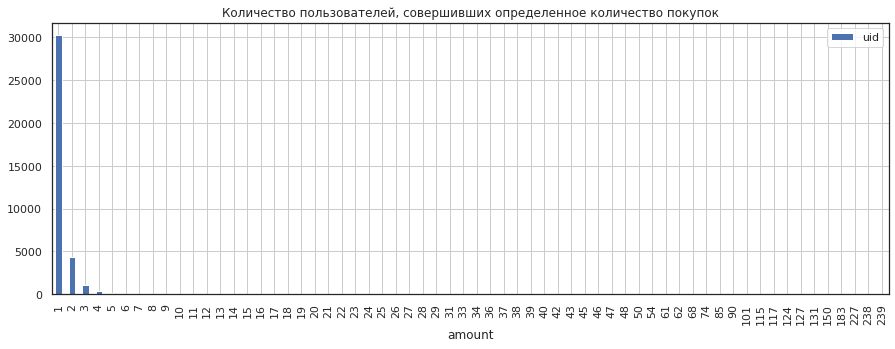

In [46]:
amount_orders_by_users.groupby('amount').count().plot(kind='bar', figsize=(15,5), grid=True, title = 'Количество пользователей, совершивших определенное количество покупок')

### Вывод

- Большинство пользователей совершает 1 покупку за год.
- Больше 4,75 покупкок совершает всего 25% пользователей.

In [48]:
print('Минимальное количество покупок одного пользователя- {}'.format(amount_orders_by_users['amount'].min()),', максимальное- {}'.format(amount_orders_by_users['amount'].max()),', большинство пользователей совершает {} заказ за год.'.format(amount_orders_by_users['amount'].mode()[0]))

Минимальное количество покупок одного пользователя- 1 , максимальное- 239 , большинство пользователей совершает 1 заказ за год.


In [49]:
amount_orders_by_month= orders.groupby('order_month').agg({'uid': 'count'})
amount_orders_by_month.columns = ['amount']
 
amount_orders_by_month.sort_values(by='amount', ascending=False).head(5) #сколько заказов в месяц


,amount
order_month,
2017-12-01,6218
2017-10-01,5679
2017-11-01,5659
2018-03-01,5326
2018-02-01,5281


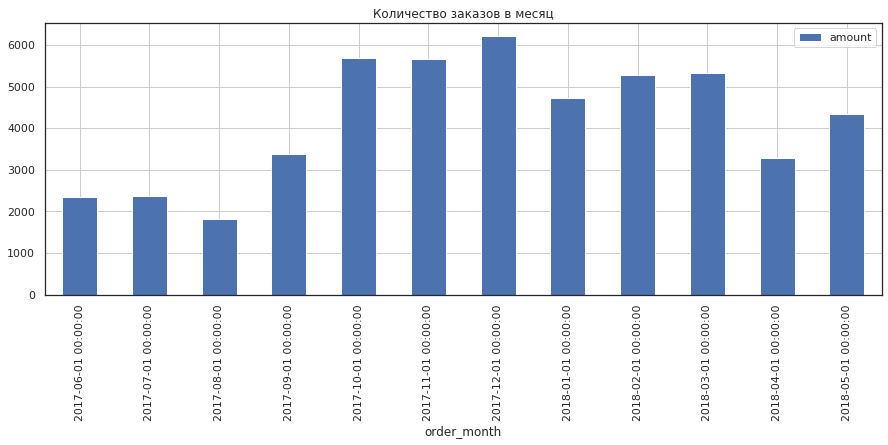

In [50]:
amount_orders_by_month.plot(kind='bar', figsize=(15,5), grid=True, title = 'Количество заказов в месяц')

### Вывод

- Летние месяцы - низкий сезон для мероприятий и высокий для отпусков. Спрос на билеты в это время соответствующий. Думаю большинство приобретает билеты на фестивали.
- С октября спрос стабилизируется и достигает пика в декабре. Не знаю когда открывается продажа билетов именно на елки, но взрослых мероприятий к новому году тоже достаточно.

In [51]:
print('Минимальное количество заказов в месяц - {}'.format(amount_orders_by_month['amount'].min()),', максимальное - {}'.format(amount_orders_by_month['amount'].max()),', в среднем в месяц пользователи совершают {} заказ.'.format(amount_orders_by_month['amount'].mean().astype('int')))

Минимальное количество заказов в месяц - 1807 , максимальное - 6218 , в среднем в месяц пользователи совершают 4201 заказ.


- Какой средний чек?

,count,sum,average_check
uid,,,
11149926373378902217,16,10519,657
16152080406371512880,1,550,550
12069004609949546307,1,407,407
9352364483376991844,1,202,202
838624912253662121,1,196,196


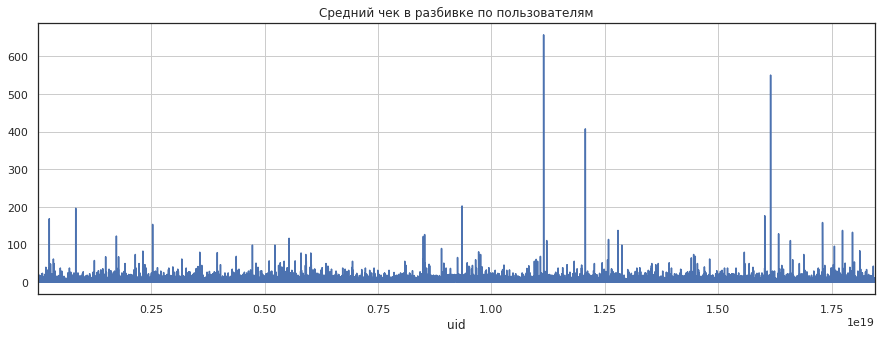

In [52]:
orders_by_uid=orders.pivot_table(index = 'uid', values = 'revenue', aggfunc = {'count', 'sum'})
orders_by_uid['average_check']=(orders_by_uid['sum']/orders_by_uid['count']).astype('int')
orders_by_uid['average_check'].plot(figsize=(15,5), title = 'Средний чек в разбивке по пользователям', grid = True)
orders_by_uid.sort_values(by='average_check', ascending=False).head(5)


In [53]:
print('Средний чек составил', round(orders_by_uid['average_check'].mean()))

Средний чек составил 4


- Средний чек в динамике

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_order_month,,,,,,,,,,,,
2017-06-01,4.696985,16.049180,17.640000,35.925926,23.431818,22.179104,31.064516,25.063830,19.275862,27.155556,25.511111,9.830189
2017-07-01,NaN,6.019241,12.442308,21.017544,10.781250,6.877551,7.842105,6.416667,7.025641,7.380952,12.954545,11.384615
2017-08-01,NaN,NaN,5.267153,11.103448,11.849057,12.204545,16.975000,12.093750,9.500000,12.454545,21.000000,8.290323
2017-09-01,NaN,NaN,NaN,5.635800,22.223077,13.440000,138.756757,19.807692,26.078125,27.409091,16.837838,10.883721
2017-10-01,NaN,NaN,NaN,NaN,5.002995,11.262136,6.780488,7.445652,7.118280,7.208333,6.535714,7.507463
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.153884,7.319820,6.766667,12.471698,7.419753,4.520833,7.516129
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.737623,7.780822,39.359223,48.092784,27.360000,23.507937
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.143789,8.684211,12.313253,11.093023,4.755556
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.155848,8.627119,4.913793,6.948718


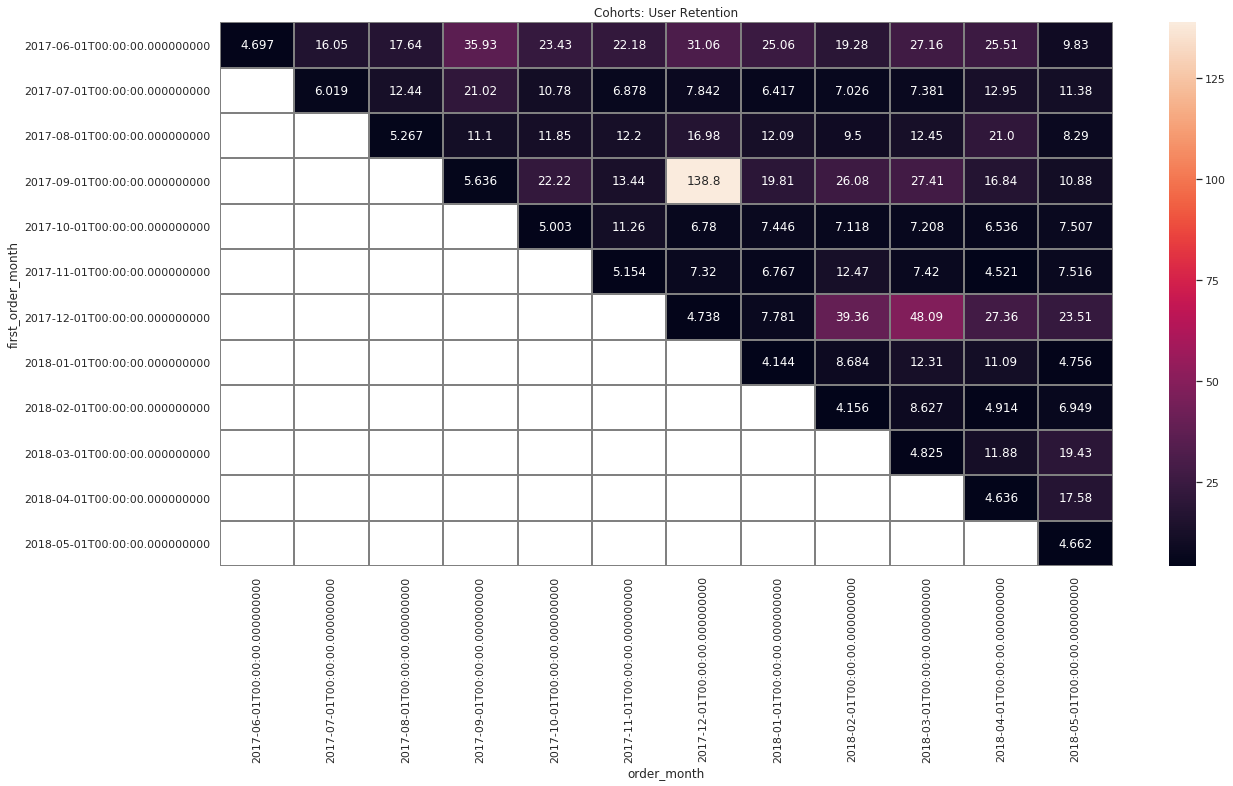

In [54]:
first_order_date_by_customers = orders.groupby('uid')['order_day'].min()
first_order_date_by_customers.name = 'first_order_date'
orders_new = orders.join(first_order_date_by_customers,on='uid')
orders_new['first_order_month'] = orders_new['first_order_date'].astype('datetime64[M]')
orders_new['order_month'] = orders_new['order_day'].astype('datetime64[M]')

orders_grouped_by_cohorts_new = orders_new.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})

orders_grouped_by_cohorts_new['revenue_per_user'] = orders_grouped_by_cohorts_new['revenue'] / orders_grouped_by_cohorts_new['uid']
average_check=orders_grouped_by_cohorts_new.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(average_check, annot=True, fmt='.4', linewidths=1, linecolor='gray')
average_check

### Вывод:

- Средний чек со временем увеличивается.
- Во всех когортах средний чек пользователей возрастает уже на следующий месяц после месяца первой покупки.
- Самый большой средний чек по пользователям был в декабре у пользователей, начавших покупать в сентябре.
- Лучшие результаты по увеличению чека показывает декабрьская когорта. Чек увеличился с 4,738 до 23,51. 

- Продажи по устройствам.

In [55]:
orders_by_devices=orders.merge(visits, on='uid', how='left')

step_1=(orders_by_devices['end_ts']>orders_by_devices['buy_ts'])
step_2=step_1&(orders_by_devices['buy_ts']>orders_by_devices['start_ts'])
orders_by_devices_filtered=orders_by_devices[step_2]
orders_by_devices_filtered.head(10)

,buy_ts,revenue,uid,order_day,order_month,device,end_ts,source_id,start_ts,year,month,week,date,session_duration,session_day
0,2017-06-01 00:10:00,17,10329302124590727494,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,120.0,2017-06-01
2,2017-06-01 00:27:00,0,17903680561304213844,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,540.0,2017-06-01
3,2017-06-01 00:29:00,1,16109239769442553005,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140.0,2017-06-01
4,2017-06-01 07:58:00,0,14200605875248379450,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680.0,2017-06-01
6,2017-06-01 08:54:00,2,12464626743129688638,2017-06-01,2017-06-01,desktop,2017-06-01 09:12:00,5,2017-06-01 08:51:00,2017,6,22,2017-06-01,1260.0,2017-06-01
258,2017-06-01 09:22:00,3,17542070709969841479,2017-06-01,2017-06-01,desktop,2017-06-01 09:26:00,4,2017-06-01 09:18:00,2017,6,22,2017-06-01,480.0,2017-06-01
259,2017-06-01 09:23:00,0,1074355127080856382,2017-06-01,2017-06-01,desktop,2017-06-01 09:24:00,1,2017-06-01 09:21:00,2017,6,22,2017-06-01,180.0,2017-06-01
260,2017-06-01 09:58:00,3,12888070354554424008,2017-06-01,2017-06-01,desktop,2017-06-01 10:13:00,3,2017-06-01 09:48:00,2017,6,22,2017-06-01,1500.0,2017-06-01
262,2017-06-01 10:27:00,1,4409266971612110231,2017-06-01,2017-06-01,desktop,2017-06-01 10:56:00,3,2017-06-01 09:55:00,2017,6,22,2017-06-01,3660.0,2017-06-01
264,2017-06-01 10:33:00,10,8635489015105716934,2017-06-01,2017-06-01,desktop,2017-06-01 10:45:00,3,2017-06-01 10:32:00,2017,6,22,2017-06-01,780.0,2017-06-01


Не все покупки совпадают по времени с промежутком между началом и окончанием сессии - стоит проверить выгрузки, а пока используем то, что есть.

In [56]:
devices_revenue = orders_by_devices_filtered.pivot_table(index = 'device', values = 'revenue', aggfunc=({'revenue' : ['count','sum']}))
devices_revenue['%']=round(devices_revenue['sum']/devices_revenue['count'])
devices_revenue

,count,sum,%
device,,,
desktop,24829,123329,5.0
touch,4753,18644,4.0


([<matplotlib.patches.Wedge at 0x7f4d6e49e610>,
 [Text(-0.44104759743182476, -1.0077087956347386, 'desktop'),
  Text(0.4410475030833164, 1.0077088369285905, 'touch')],
 [Text(-0.2405714167809953, -0.5496593430734936, '86.9%'),
  Text(0.24057136531817255, 0.5496593655974129, '13.1%')])

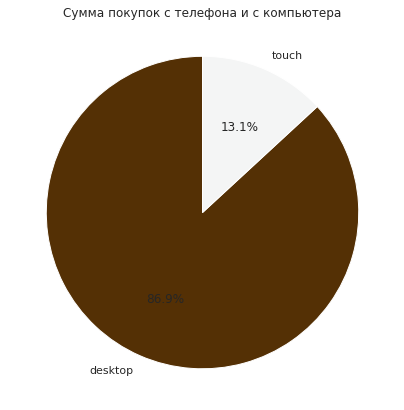

In [57]:
devices_revenue_sum = orders_by_devices_filtered.pivot_table(index = 'device', values = 'revenue', aggfunc='sum')
devices_revenue_sum['%']=round(devices_revenue_sum['revenue']/devices_revenue_sum['revenue'].sum()*100)
devices_revenue_sum

labels = devices_revenue_sum.index
sizes = devices_revenue_sum['revenue']

fig1, ax1 = plt.subplots(figsize=(7,7))

ax1.axis('equal') 
plt.title('Сумма покупок с телефона и с компьютера')
theme = plt.get_cmap("BrBG")
ax1.set_prop_cycle("color", [theme(1. * i / 2)
                             for i in range(2)])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 

([<matplotlib.patches.Wedge at 0x7f4d6e2da8d0>,
 [Text(-0.5319629028481556, -0.96281642590546, 'desktop'),
  Text(0.5319628577754649, 0.9628164508084397, 'touch')],
 [Text(-0.2901615833717212, -0.5251725959484327, '83.9%'),
  Text(0.2901615587866172, 0.5251726095318762, '16.1%')])

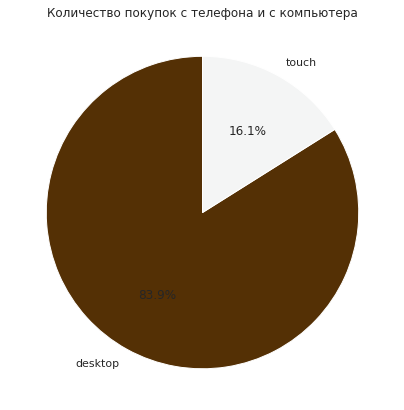

In [58]:
devices_revenue_count = orders_by_devices_filtered.pivot_table(index = 'device', values = 'revenue', aggfunc='count')
devices_revenue_count['%']=round(devices_revenue_count['revenue']/devices_revenue_count['revenue'].sum()*100)

labels = devices_revenue_count.index
sizes = devices_revenue_count['revenue']

fig2, ax2 = plt.subplots(figsize=(7,7))

ax2.axis('equal') 
plt.title('Количество покупок с телефона и с компьютера')
theme = plt.get_cmap("BrBG")
ax2.set_prop_cycle("color", [theme(1. * i / 2)
                             for i in range(2)])
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 


### Вывод

- Количество и сумма покупок с компьютера значительно превышают аналогичные показатели с телефона.
- Средняя сумма покупки с компьютера также выше.

##### Проверим вероятность  точности этих выводов.

- Нулевая гипотеза (Н0): средняя выручка с пользователей компьютера равна средней выручке с пользователей телефона.
- Альтернативная гипотеза (Н1): средняя выручка с пользователей компьютера и с пользователей телефона различается.

In [59]:
alpha = .05
results = st.ttest_ind(orders_by_devices_filtered.query('device == "desktop"')['revenue'], orders_by_devices_filtered.query('device == "touch"')['revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, c вероятностью в {:.0%} различие может получиться случайно.'.format(results.pvalue))

p-значение: 3.318299156585451e-10
Отвергаем нулевую гипотезу.


Данные не подтверждают сделанное в H₀ предположение. Вероятность их равенства слишком мала.

По всей видимости, средние выручки с компьютера и телефона действительно различаются.

- Сколько денег приносят? (LTV)

In [60]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers'] # сколько людей совершили покупку впервые в каждом месяце
cohort_sizes.sort_values(by='n_buyers', ascending=False)

orders_first_month = pd.merge(orders,first_orders, on='uid') # добавим месяц первого заказа в датафрейм к покупкам
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index() # группируем в когорты
report = pd.merge(cohort_sizes, cohorts, on='first_order_month') # объединим


In [61]:
margin_rate = 1

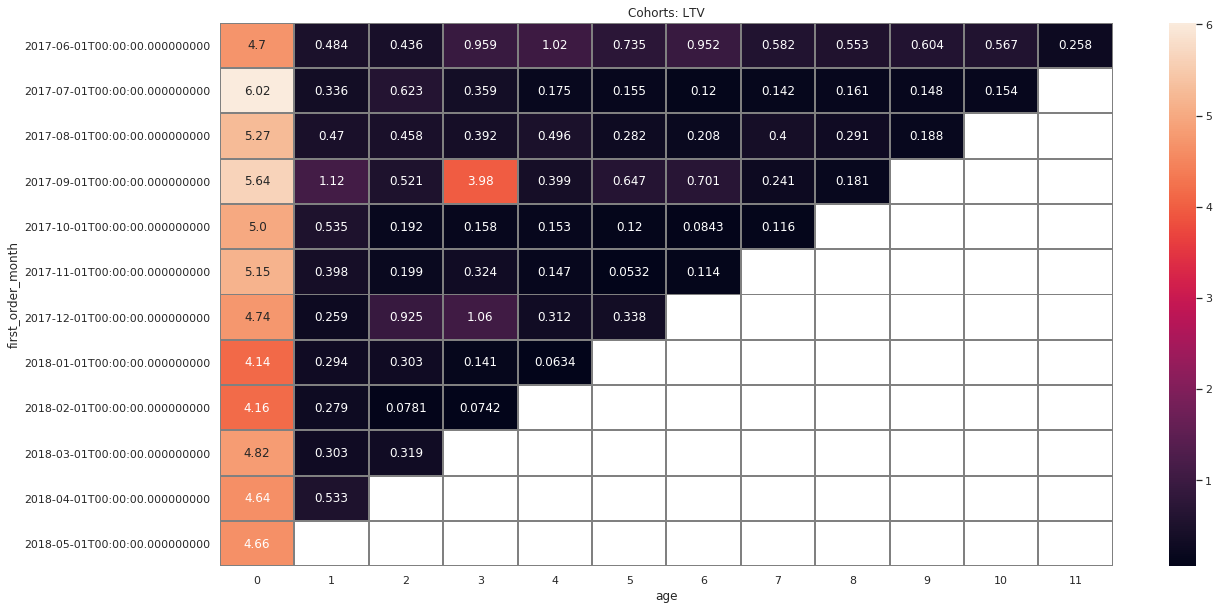

In [62]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = round((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).astype('int')  # возраст каждой когорты 
report['ltv'] = report['gp'] / report['n_buyers'] # LTV когорт

result = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: LTV')
sns.heatmap(result, annot=True, fmt='.3', linewidths=1, linecolor='gray')


In [63]:
print(result.loc['2017-06-01'].sum())


11.84577360355907


### Вывод

- При маржинальности 5% каждый покупатель во всех когортах в среднем принес 7,27 за время жизни своей кагорты.
- При этом каждый покупатель первой кагорты принес в среднем 11,8 за год жизни, а последней - 4,7 за один месяц.
- Наиболее прибыльными были пользователи, совершившие первый заказ в сентябре и в декабре.


##### Маркетинг


- Сколько денег потратили?

In [64]:
print('Всего потратили {}'.format(costs['costs'].sum()))

Всего потратили 329136


,costs,%
source_id,,
3,141321,43.0
4,61069,19.0
5,51767,16.0
2,42805,13.0
1,20837,6.0
9,5519,2.0
10,5818,2.0


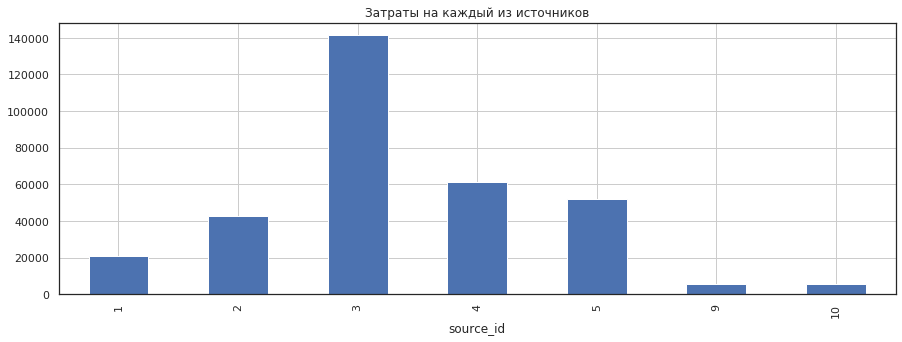

In [65]:
costs_by_source_id=costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum')
costs_by_source_id['%']=round(costs_by_source_id['costs']/costs_by_source_id['costs'].sum()*100)
costs_by_source_id
costs_by_source_id['costs'].plot(kind='bar', title = 'Затраты на каждый из источников', figsize = (15, 5), grid = True)
costs_by_source_id.sort_values(by='%', ascending=False)

### Вывод

- Большую часть расходов составили затраты на 3 источник (43% от всех затрат).
- 6 и 7 рекламный источник затрат не требовали.

- По времени

In [66]:
costs['dt']=pd.to_datetime(costs['dt'])
costs['month']=costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby(['source_id', 'month'])['costs'].sum() # помесячные расходы
monthly_costs


source_id_costs=costs.groupby('month').sum().astype('int64')

report_new = pd.merge(report, source_id_costs, left_on='first_order_month', right_on='month' ) # добавим помесячные расходы в когортный отчет
report_new['cac'] = report_new['costs'] / report_new['n_buyers'] # CAC
report_new




,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9502,9502,0,4.696985,1020,18016,8.905586
1,2017-06-01,2023,2017-07-01,979,979,1,0.483935,1020,18016,8.905586
2,2017-06-01,2023,2017-08-01,882,882,2,0.435986,1020,18016,8.905586
3,2017-06-01,2023,2017-09-01,1940,1940,3,0.958972,1020,18016,8.905586
4,2017-06-01,2023,2017-10-01,2062,2062,4,1.019278,1020,18016,8.905586
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1069,1069,1,0.302576,1025,30408,8.606850
74,2018-03-01,3533,2018-05-01,1127,1127,2,0.318992,1025,30408,8.606850
75,2018-04-01,2276,2018-04-01,10552,10552,0,4.636204,986,22294,9.795255
76,2018-04-01,2276,2018-05-01,1213,1213,1,0.532953,986,22294,9.795255


### Вывод

- Со временем стоимость привлечения покупателей увеличивается.
- В среднем привлечение по всем когортам за срок их жизни составило 60,6.
- В расчете на каждый месяц жизни в среднем - 9.  

- Расчет CAC, LTV и ROMI по источникам на месяц совершения покупки и оплаты рекламы

source_id,1,2,3,4,5,7,9,10
month_new,,,,,,,,
0,5.733990,5.708487,4.240000,4.919048,4.879032,NaN,3.300971,2.195402
1,8.954955,7.746324,5.235556,6.369388,5.592138,NaN,5.462500,3.375000
2,7.679487,6.811429,5.622378,4.661721,6.374622,1.0,4.416667,1.656250
3,11.576803,10.279778,5.132353,5.462036,6.023140,NaN,4.640625,3.551282
4,8.454751,11.739206,4.414794,4.540159,5.783644,NaN,4.297436,2.646154
5,8.409962,9.163807,4.846985,5.326299,5.031464,NaN,4.283333,4.245902
6,7.407821,23.526316,4.484056,4.357491,5.905303,NaN,3.936170,3.644444
7,7.225064,8.923077,3.965363,3.804856,4.555228,NaN,3.277027,3.098765
8,8.263948,14.656420,4.195326,4.655775,4.980094,NaN,3.629213,2.509934


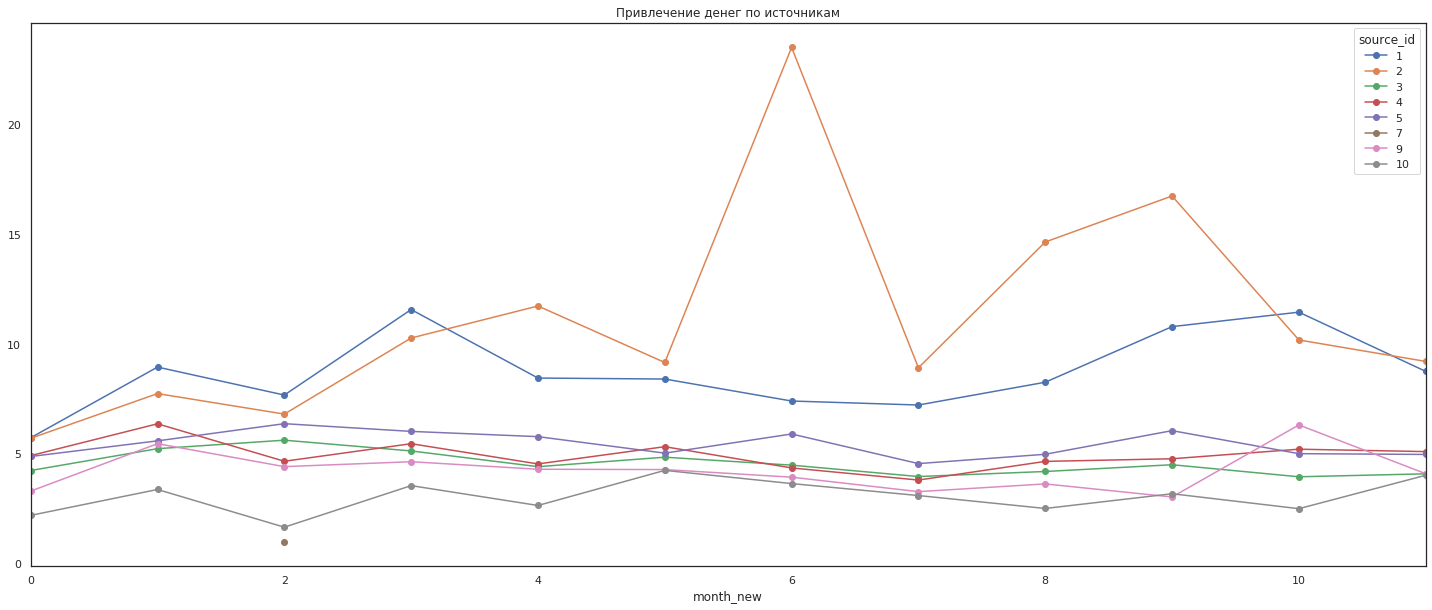

In [67]:
orders['month_new'] = (((orders['buy_ts'] - orders['buy_ts'].min())/np.timedelta64(1,'M')).astype('int')) #месяц покупки
costs['month_new'] = (((costs['dt'] - costs['dt'].min())/np.timedelta64(1,'M')).astype('int')) #месяц расхода
 
visits_sourse = visits[['uid','source_id']].drop_duplicates('uid')
orders = orders.merge(visits_sourse)
 
orders_group = orders.groupby(['month_new','source_id']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
orders_group.columns = ['month_new', 'source_id', 'revenue', 'n_buyers']
orders_group['ltv'] = orders_group['revenue'] / orders_group['n_buyers']

result_source = orders_group.pivot_table(
        index='month_new', 
        columns='source_id', 
        values='ltv', 
        aggfunc='mean')
 
result_source.plot(style = '-o', figsize = (25, 10), title = 'Привлечение денег по источникам')
result_source




source_id,1,2,3,4,5,9,10
month_new,,,,,,,
0,5.581281,9.188192,13.744348,8.469048,7.231183,2.834951,3.781609
1,4.810811,8.352941,16.660000,7.116327,7.196560,3.687500,6.583333
2,6.096154,10.354286,21.486014,9.548961,6.598187,2.952381,7.187500
3,4.714734,8.268698,14.651471,8.387722,6.363636,3.273438,5.910256
4,5.246606,8.369603,14.735955,5.666372,5.969979,3.133333,3.230769
5,4.680077,8.187207,15.324032,4.372565,8.653899,2.854167,6.500000
6,4.363128,7.805423,13.262469,5.349129,7.416667,3.484043,7.166667
7,5.340153,9.496503,16.012291,5.179856,7.653903,3.594595,7.493827
8,5.085837,8.415913,12.851419,4.673252,6.373536,3.252809,3.291391


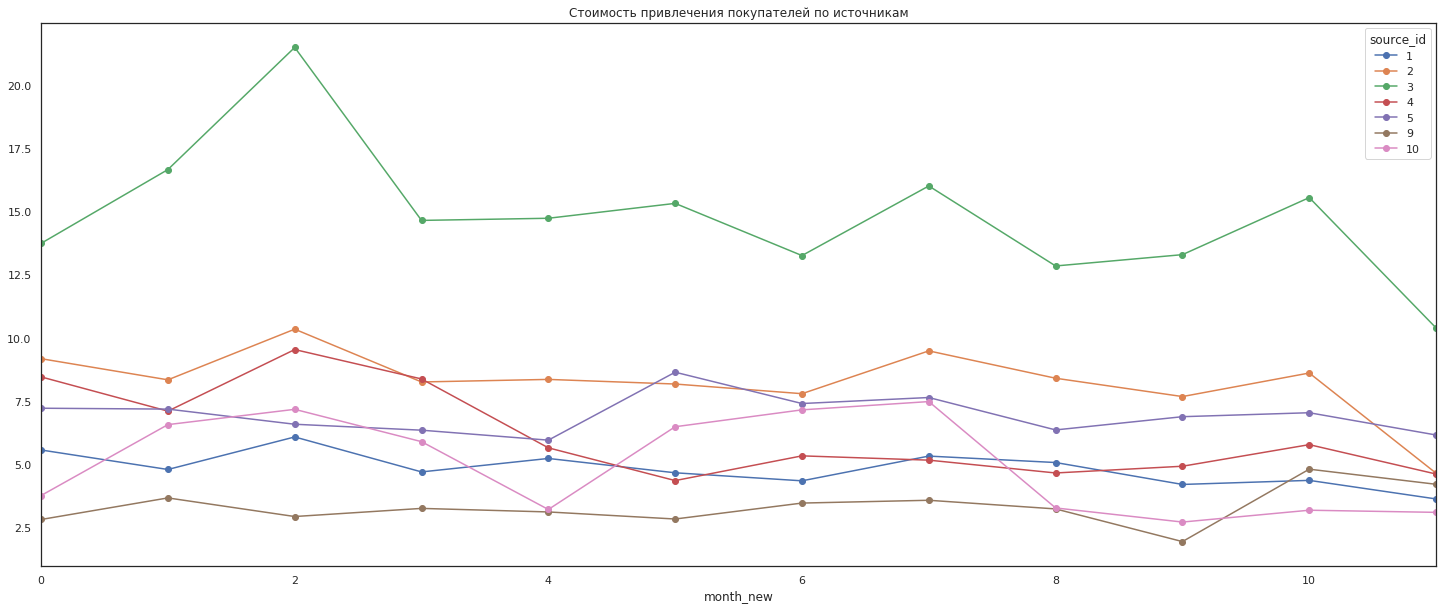

In [68]:
costs_group = costs.groupby(['source_id','month_new'])['costs'].sum().reset_index()

result_orders_costs = orders_group.merge(costs_group, how = 'left', on =('month_new', 'source_id'))
result_orders_costs['cac'] = result_orders_costs['costs'] / result_orders_costs['n_buyers']

cac_new = result_orders_costs.pivot_table(
        index='month_new', 
        columns='source_id', 
        values='cac', 
        aggfunc='mean')


cac_new.plot(style = '-o', figsize = (25, 10), title = 'Cтоимость привлечения покупателей по источникам')
cac_new

In [69]:
result_orders_costs['romi'] = result_orders_costs['ltv'] / result_orders_costs['cac']

output_orders_costs = result_orders_costs.pivot_table(
        index=('month_new'),
        columns='source_id',
        values='romi',
        aggfunc='mean').round(4)

output_orders_costs.round(2)

source_id,1,2,3,4,5,9,10
month_new,,,,,,,
0,1.03,0.62,0.31,0.58,0.67,1.16,0.58
1,1.86,0.93,0.31,0.90,0.78,1.48,0.51
2,1.26,0.66,0.26,0.49,0.97,1.50,0.23
3,2.46,1.24,0.35,0.65,0.95,1.42,0.60
4,1.61,1.40,0.30,0.80,0.97,1.37,0.82
5,1.80,1.12,0.32,1.22,0.58,1.50,0.65
6,1.70,3.01,0.34,0.81,0.80,1.13,0.51
7,1.35,0.94,0.25,0.73,0.60,0.91,0.41
8,1.62,1.74,0.33,1.00,0.78,1.12,0.76


### Вывод:

- Наибольшее количество денег приносят покупатели, пришедшие из 2 и 1 источников. хотя чаще покупают посетители из 4 (это я писала ниже).
- 6 и 7 источники совершенно не перспективны, впрочем на них и не делится маркетинговый бюджет.
- По стоимости привлечения уверенно лидирует 3 источник. Возможно его развивают на перспективу. Возможно высокодоходный сегмент.
- 1,2 и 9 источник показывают лучшие ежемесячные показатели окупаемости. 


- Сколько стоило привлечение одного посетителя и покупателя из каждого источника?

Стоимость привлечения одного поcетителя


,all_users,costs,costs_for_one_user
source_id,,,
3,85609,141321.0,1.650773
2,47626,42805.0,0.898774
5,66905,51767.0,0.773739
1,34121,20837.0,0.610680
4,101794,61069.0,0.599927
10,10025,5818.0,0.580349
9,13276,5519.0,0.415713
6,6,NaN,NaN
7,36,NaN,NaN


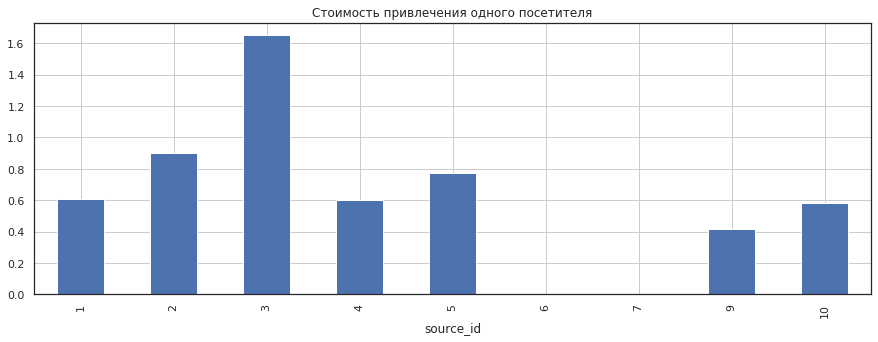

In [70]:
source_id_costs2=costs.groupby('source_id').sum()
visits_source_id=visits.groupby('source_id').count()

costs_by_source_id_for_visits=pd.merge(visits_source_id, source_id_costs2, on='source_id', how='left')
columns =['end_ts', 'start_ts', 'uid', 'week', 'month', 'year', 'date', 'session_duration','session_day', 'month_new'] 
costs_by_source_id_for_visits.drop(columns, inplace=True, axis=1) 

costs_by_source_id_for_visits.columns=['all_users', 'costs']
costs_by_source_id_for_visits['costs_for_one_user']=costs_by_source_id_for_visits['costs']/costs_by_source_id_for_visits['all_users']

costs_by_source_id_for_visits['costs_for_one_user'].plot(kind='bar', title = 'Стоимость привлечения одного поcетителя', figsize = (15, 5), grid = True)
print('Стоимость привлечения одного поcетителя')
costs_by_source_id_for_visits.sort_values(by='costs_for_one_user', ascending=False)

Стоимость привлечения одного покупателя


,buyers,costs,costs_for_one_buyer
source_id,,,
3,6690,141321.0,21.124215
2,3848,42805.0,11.123960
5,5833,51767.0,8.874850
4,7389,61069.0,8.264853
9,739,5519.0,7.468200
10,919,5818.0,6.330794
1,4163,20837.0,5.005285
7,1,NaN,NaN


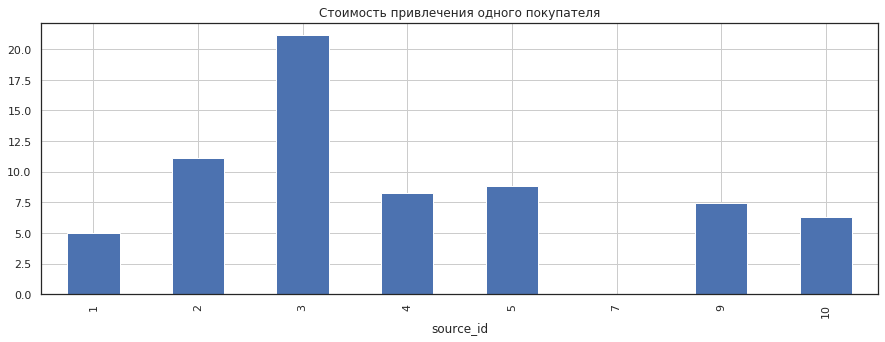

In [71]:
orders_source_id=orders_by_devices_filtered.groupby('source_id').count()
orders_source_id=orders_source_id[['uid']]
orders_source_id

costs_by_source_id_for_orders=pd.merge(orders_source_id, source_id_costs2, on='source_id', how='left')
costs_by_source_id_for_orders=costs_by_source_id_for_orders[['uid', 'costs']]
costs_by_source_id_for_orders.columns=['buyers', 'costs']

costs_by_source_id_for_orders['costs_for_one_buyer']=costs_by_source_id_for_orders['costs']/costs_by_source_id_for_orders['buyers']

costs_by_source_id_for_orders['costs_for_one_buyer'].plot(kind='bar', title = 'Стоимость привлечения одного покупателя', figsize = (15, 5), grid = True)
print('Стоимость привлечения одного покупателя')
costs_by_source_id_for_orders.sort_values(by='costs_for_one_buyer', ascending=False)

### Вывод

- Стоимость привлечения одного посетителя больше для 3 источника (1.65). Хотя большинство посетителей пришло из 4.
- Стоимость привлечения одного покупателя также больше для 3 источника (21.12). Хотя большинство покупателей пришло из 4.
- Стоит обратить внимание также на 1 источник, который позволил привлечь чуть больше 4000 человек, но стоимость привлечения в котором дешевле.

- На сколько окупились расходы? (ROI)

In [72]:
visits_orders=orders.groupby('uid').sum()
visits_orders

visits_orders2=pd.merge(visits_source_id, source_id_costs, on='source_id', how='left')

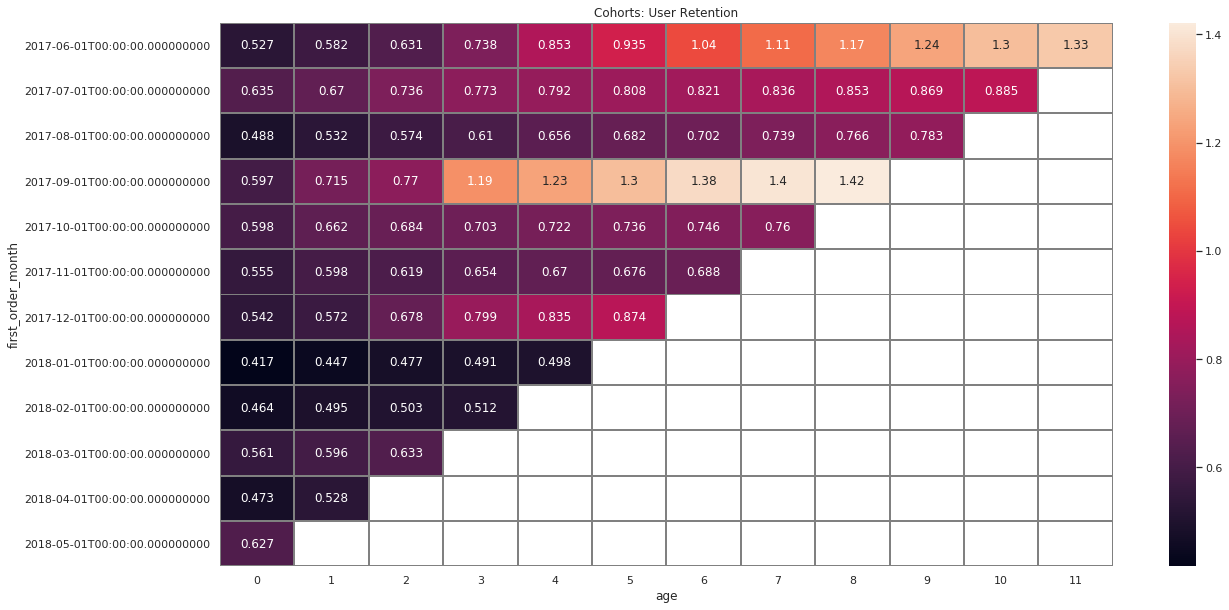

In [73]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')



sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.3', linewidths=1, linecolor='gray')



In [74]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540210
1     0.581297
2     0.630526
3     0.719289
4     0.782389
5     0.859084
6     0.895885
7     0.968857
8     1.052445
9     0.963059
10    1.093029
11    1.330151
dtype: float64

### Вывод

- К сожалению, судя по по отчёту, до сих пор ни одна когорта не окупилась и до окупаемости еще далеко.
- Лучше всего показывает себя сентябрьская когорта, возможно в этот момент запускались какие-то акции для стимуляции покупок.
- Такой результат может быть связан с заданной маржинальностью, но даже если ее повышать, сервис в заданный период не окупился и пока убыточен.
- Возможно это связано с активной раскруткой сервиса на данном этапе.

### Общий вывод

#### По итогам анализа представленных данных можно сказать:

- Число активных пользователей в месяц внушительное. Сервис популярен.
- Больше всего посещений (73,1%) и покупок по сумме (86,9%) и по количеству (83,9%) происходит с компьютера.
- Пользователи чаще возвращаются на сайт, используя компьютер.
- Спрос на услуги сервиса подвержен сезонности. Лето - низкий сезон.
- При расчете ROMI без учета маржинальности, в среднем когорты показывают окупаемость к концу 10 месяца.
- Каждый покупатель во всех когортах в среднем принес 7,27 за время жизни своей кагорты.
- Большую часть расходов составили затраты на 3 источник (43% от всех затрат).
#### Что касается источников:
- 1,2 и 9 источник показывают лучшие ежемесячные показатели окупаемости. На них стоит обратить внимание, если компания считает, что достигла необходимых показателей роста и хочет дальше стабильно получать те деньги, которые сейчас зарабатывает.
- По 4 источнику стоит попытаться увеличить средний чек.
- 3 источник, видимо, развивают с целью получения дальнейшей выручки. Как с ним поступить зависит от возложенных на него целей. 

#### Рекомендации:

- Обратить внимание на мобильную версию сайта:
  - возможно возникают неудобства при оплате заказа - например с вводом карты, тогда стоит реализовать возможность оплаты через Pay;
  - возможно с телефона неудобно выбрать место в зале, тогда стоит добавить возможность маштабизования карты.
- Охватывать большее количество летних мероприятий.
- Необходимо детальнее рассмотреть сентябрьскую когорту. Она показала хорошие результаты. Возможно для регистрирующихся в это время проводилась акция. Если так, то акция успешна. 